In [1]:
# ReflexionPro - VO2 Max Analysis
# ================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# ================================
# 1. Load & Clean Dataset
# ================================
file_path_vo2 = "simu_vo2_activities.csv"
df_vo2 = pd.read_csv(file_path_vo2)

# Convert Activity Date to datetime
df_vo2["Activity Date"] = pd.to_datetime(df_vo2["Activity Date"], errors="coerce")

# Pick relevant numeric columns for analysis
numeric_cols = ["Distance", "Max Heart Rate", "Average Heart Rate",
                "Calories", "Average Speed", "Average Cadence",
                "Average Watts", "VO2 Max"]

df_num = df_vo2[numeric_cols]

print("✅ Dataset cleaned and numeric subset created")
print(df_num.describe())

✅ Dataset cleaned and numeric subset created
         Distance  Max Heart Rate  Average Heart Rate     Calories  \
count  345.000000      345.000000          345.000000   345.000000   
mean    34.531594      160.881159          136.136519  1007.990512   
std     29.416878       20.664550           23.725052   618.158633   
min      4.060000      118.000000           78.110161    79.000000   
25%     12.150000      142.000000          115.224136   574.000000   
50%     24.280000      160.000000          131.012604   883.000000   
75%     52.230000      178.000000          157.365295  1241.000000   
max    180.080000      210.000000          183.237244  4325.000000   

       Average Speed  Average Cadence  Average Watts     VO2 Max  
count     345.000000       345.000000     345.000000  345.000000  
mean        5.409151        75.884899     196.020146   32.824596  
std         2.395178         7.807449      50.260697    5.407514  
min         2.696547        57.603649      95.289047   2

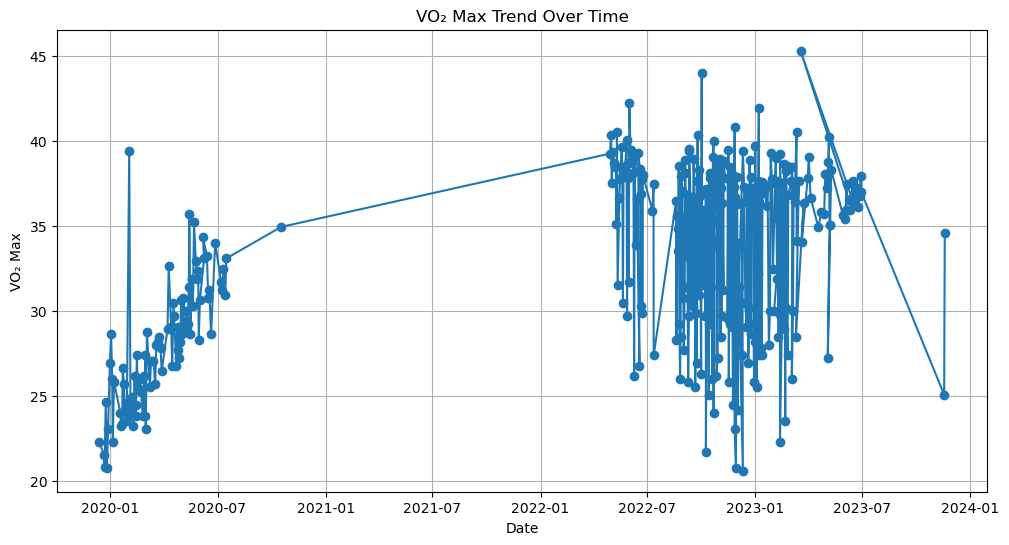

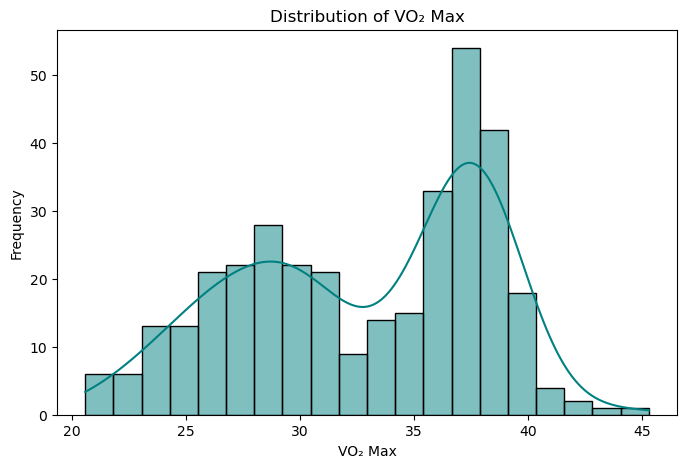

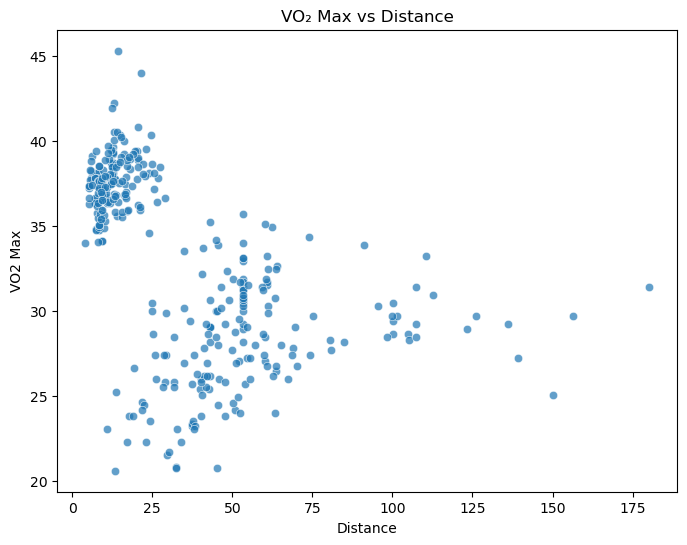

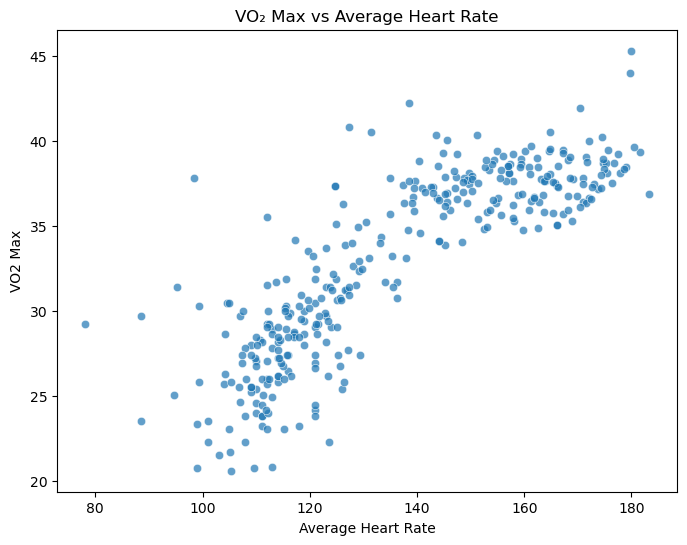

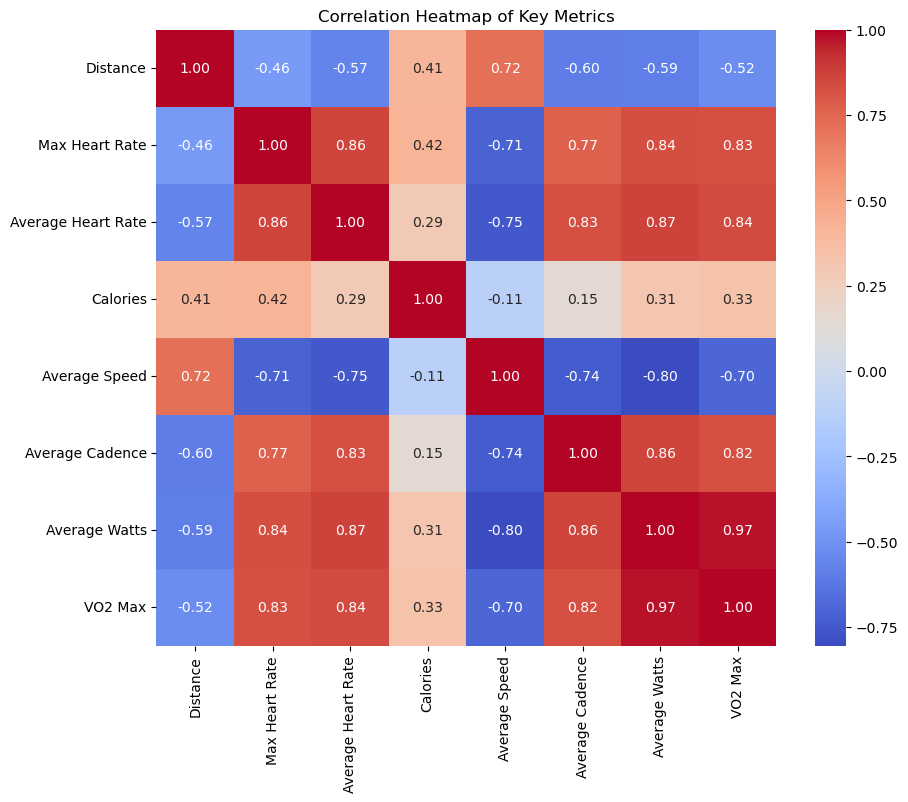

In [2]:
# 2. Exploratory Data Analysis
# ================================

# 2.1 VO2 Max over time
plt.figure(figsize=(12,6))
plt.plot(df_vo2["Activity Date"], df_vo2["VO2 Max"], marker="o", linestyle="-")
plt.title("VO₂ Max Trend Over Time")
plt.xlabel("Date")
plt.ylabel("VO₂ Max")
plt.grid(True)
plt.show()

# 2.2 Distribution of VO2 Max
plt.figure(figsize=(8,5))
sns.histplot(df_vo2["VO2 Max"], bins=20, kde=True, color="teal")
plt.title("Distribution of VO₂ Max")
plt.xlabel("VO₂ Max")
plt.ylabel("Frequency")
plt.show()

# 2.3 VO2 Max vs Distance
plt.figure(figsize=(8,6))
sns.scatterplot(x="Distance", y="VO2 Max", data=df_vo2, alpha=0.7)
plt.title("VO₂ Max vs Distance")
plt.show()

# 2.4 VO2 Max vs Average Heart Rate
plt.figure(figsize=(8,6))
sns.scatterplot(x="Average Heart Rate", y="VO2 Max", data=df_vo2, alpha=0.7)
plt.title("VO₂ Max vs Average Heart Rate")
plt.show()

# 2.5 Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Key Metrics")
plt.show()


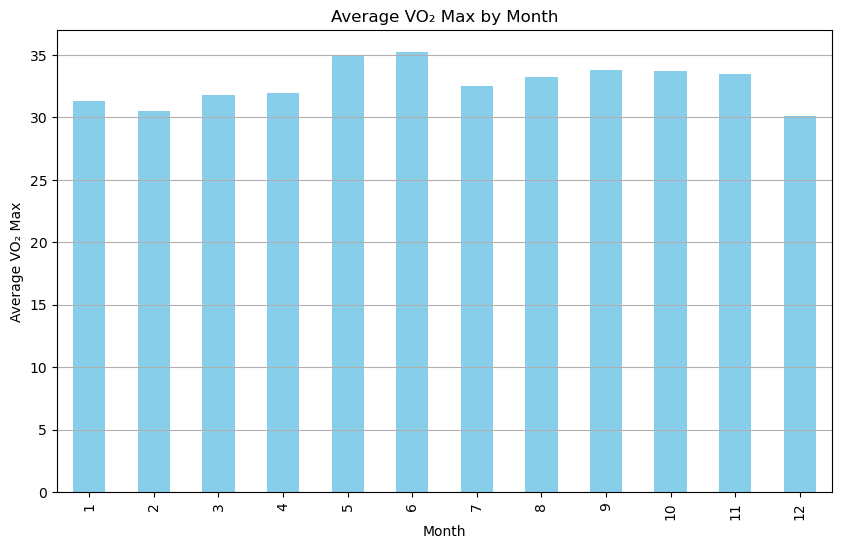

C:\Users\saumya\AppData\Local\Temp\ipykernel_28664\573418142.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Heart Rate Zone', y='VO2 Max', data=df_vo2, palette='viridis')


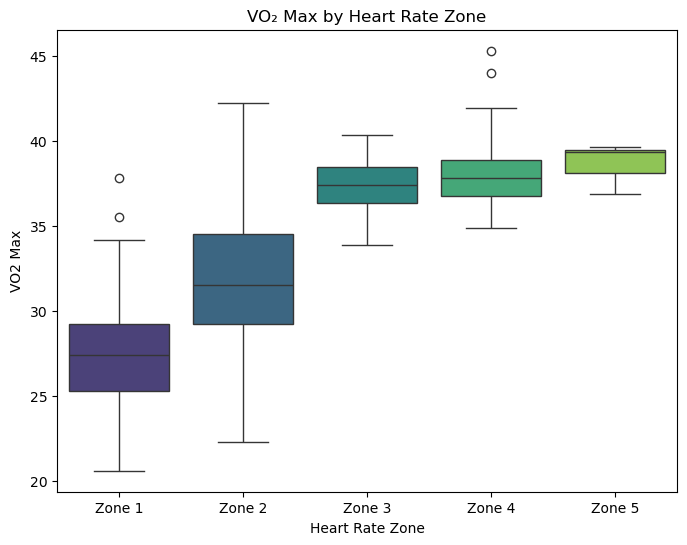


Summary Statistics:
         Activity ID                  Activity Date  Elapsed Time    Distance  \
count  3.450000e+02                            345    345.000000  345.000000   
mean   6.902344e+09  2022-03-15 14:44:55.588406016   5979.898551   34.531594   
min    2.929442e+09            2019-12-13 01:46:07   1506.000000    4.060000   
25%    3.758711e+09            2020-07-13 23:26:10   3646.000000   12.150000   
50%    7.882339e+09            2022-09-28 21:01:47   5583.000000   24.280000   
75%    8.334993e+09            2023-01-04 05:58:12   7338.000000   52.230000   
max    1.027158e+10            2023-11-19 00:21:15  22391.000000  180.080000   
std    2.216048e+09                            NaN   3386.451360   29.416878   

       Max Heart Rate  Relative Effort  Athlete Weight   Moving Time  \
count      345.000000       345.000000      345.000000    345.000000   
mean       160.881159        90.675362       80.046377   5756.182609   
min        118.000000         5.000000   

In [7]:
# Step 3: Additional EDA
# ========================================

# 3.1 Seasonal Analysis
df_vo2['Month'] = df_vo2['Activity Date'].dt.month
seasonal_vo2 = df_vo2.groupby('Month')['VO2 Max'].mean()

plt.figure(figsize=(10,6))
seasonal_vo2.plot(kind='bar', color='skyblue')
plt.title("Average VO₂ Max by Month")
plt.xlabel("Month")
plt.ylabel("Average VO₂ Max")
plt.grid(axis='y')
plt.show()

# 3.2 Heart Rate Zone Analysis (Create zones if missing)
if 'Heart Rate Zone' not in df_vo2.columns:
    def get_hr_zone(hr):
        if hr < 120:
            return 'Zone 1'
        elif hr < 140:
            return 'Zone 2'
        elif hr < 160:
            return 'Zone 3'
        elif hr < 180:
            return 'Zone 4'
        else:
            return 'Zone 5'
    df_vo2['Heart Rate Zone'] = df_vo2['Average Heart Rate'].apply(get_hr_zone)

plt.figure(figsize=(8,6))
sns.boxplot(x='Heart Rate Zone', y='VO2 Max', data=df_vo2, palette='viridis')
plt.title("VO₂ Max by Heart Rate Zone")
plt.show()

# Summary Stats
print("\nSummary Statistics:\n", df_vo2.describe())


